Percentage of Charged Off Loans: 10.27%
Total amount paid before charge-off: $37,400,589.04
Total expected loss from charged-off loans: $51,533,887.37
remaining_term
0.0       £238,497.19
1.0         £4,737.23
2.0        £25,072.75
3.0        £17,478.98
4.0        £43,635.06
5.0        £49,921.81
6.0       £139,502.21
7.0        £94,447.51
8.0       £174,153.80
9.0       £160,137.25
10.0      £256,237.96
11.0      £213,837.38
12.0      £178,395.31
13.0      £387,010.01
14.0      £454,238.94
15.0      £627,380.71
16.0      £805,974.75
17.0      £799,205.85
18.0      £853,288.31
19.0      £950,328.40
20.0      £960,284.94
21.0    £1,141,224.62
22.0      £998,511.91
23.0    £1,135,956.91
24.0    £1,245,800.48
25.0    £1,117,463.88
26.0    £1,162,434.39
27.0    £1,050,344.04
28.0    £1,313,306.37
29.0    £1,652,689.43
30.0    £1,379,689.15
31.0    £1,034,362.46
32.0      £943,786.26
33.0      £917,128.65
34.0      £760,057.75
35.0      £697,840.78
36.0      £457,218.59
37.0      £649,980.5

/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_71649/59900559.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_charged_off['expected_loss'] = loans_charged_off['loan_amount'] - (
/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_71649/59900559.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_charged_off['remaining_term'] = loans_charged_off['term_months'] - (
/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_71649/59900559.py:34: SettingWithCopyWarning: 
A v

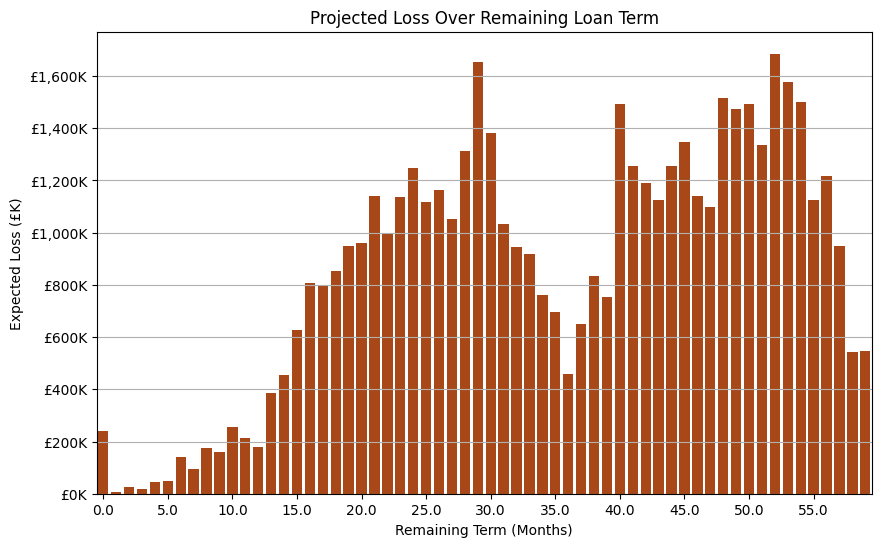

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

df = pd.read_csv('financial_loan_data.csv')

# identifying charged off loans
loans_charged_off = df[df['loan_status'] == 'Charged Off']

# calculating and printing percentage of charged off loans
charged_off_pct = (len(loans_charged_off) / len(df)) * 100
print(f'Percentage of Charged Off Loans: {charged_off_pct:.2f}%')

# calculating amound paid before charge off
total_paid_charged_off_loans = loans_charged_off['total_payment'].sum()
print(f"Total amount paid before charge-off: ${total_paid_charged_off_loans:,.2f}")


loans_charged_off['expected_loss'] = loans_charged_off['loan_amount'] - (
    loans_charged_off['total_rec_prncp'] + loans_charged_off['recoveries']
)
# # formula for expected loss on charged off loans - includes interest
# loans_charged_off['expected_loss'] = (loans_charged_off['instalment'] * loans_charged_off['term_months']) - loans_charged_off['total_payment']

# calculating & printing total expected loss
total_loss = loans_charged_off['expected_loss'].sum()
print(f"Total expected loss from charged-off loans: ${total_loss:,.2f}")

# calculating remaining term for charged off loans since last payment date & making sure no negative values
loans_charged_off['remaining_term'] = loans_charged_off['term_months'] - (
    (pd.to_datetime(loans_charged_off['last_payment_date']) - pd.to_datetime(loans_charged_off['issue_date'])).dt.days // 30
)
loans_charged_off['remaining_term'] = loans_charged_off['remaining_term'].clip(lower=0)


# aggregating losses by remaining months  / converting to amounts to make sense to me
loss_over_time = loans_charged_off.groupby('remaining_term')['expected_loss'].sum().sort_index()
loss_over_time_amount = loss_over_time.apply(lambda x: f"£{x:,.2f}")
print(loss_over_time_amount)

# visualizing projected loss over months

plt.figure(figsize=(10, 6))
sns.barplot(x=loss_over_time.index, y=loss_over_time.values, color='#C04000')

plt.xlabel('Remaining Term (Months)')
plt.ylabel('Expected Loss (£K)')
plt.title('Projected Loss Over Remaining Loan Term')

# formatting y-axis to show values in thousands (K)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'£{x/1000:,.0f}K'))
# shows only every 5 months on x axsis
plt.xticks(ticks=loss_over_time.index[::5])

plt.grid(axis='y')
plt.show()

